In [1]:
# load packages
import os
import sys
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

1.12.0


# Prepare Data

In [2]:
# load data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
print("Train:", x_train.shape, y_train.shape)
print("Test:", x_test.shape, y_test.shape)

Train: (60000, 28, 28) (60000,)
Test: (10000, 28, 28) (10000,)


In [4]:
# normlize the data
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

In [5]:
# one-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [6]:
# reshape input image to 1-channel images form 3-channel images
w, h = 28, 28
x_train = x_train.reshape(x_train.shape[0], w, h, 1)
x_test = x_test.reshape(x_test.shape[0], w, h, 1)

# Simple Perceptron Based Model

In [7]:
# create a baseline model
model = tf.keras.Sequential()

# flatten the image
model.add(tf.keras.layers.Flatten())

# first dense layer
model.add(tf.keras.layers.Dense(units=512, activation="relu", input_shape=(28, 28)))

# classifier layer
model.add(tf.keras.layers.Dense(units=10, activation="softmax"))

# compile the model
model.compile(
    loss="categorical_crossentropy",
    optimizer="rmsprop",
    metrics=["accuracy"])

# set callback config
cbk = [tf.keras.callbacks.EarlyStopping(patience=3)]

# view the model architecture
# model.summary()

In [8]:
# train the model
history1 = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=64,
    validation_data=(x_test, y_test),
    verbose=True,
    callbacks=cbk
)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 56us/step - loss: 0.2220 - acc: 0.9344 - val_loss: 0.1291 - val_acc: 0.9605
Epoch 2/10
60000/60000 [==============================] - 3s 51us/step - loss: 0.0911 - acc: 0.9728 - val_loss: 0.0911 - val_acc: 0.9728
Epoch 3/10
60000/60000 [==============================] - 3s 50us/step - loss: 0.0612 - acc: 0.9820 - val_loss: 0.0935 - val_acc: 0.9705
Epoch 4/10
60000/60000 [==============================] - 3s 48us/step - loss: 0.0463 - acc: 0.9863 - val_loss: 0.0688 - val_acc: 0.9800
Epoch 5/10
60000/60000 [==============================] - 3s 48us/step - loss: 0.0348 - acc: 0.9893 - val_loss: 0.0765 - val_acc: 0.9777
Epoch 6/10
60000/60000 [==============================] - 3s 50us/step - loss: 0.0275 - acc: 0.9922 - val_loss: 0.0688 - val_acc: 0.9809
Epoch 7/10
60000/60000 [==============================] - 3s 51us/step - loss: 0.0215 - acc: 0.9941 - val_loss: 0.0788 - val_acc

# CNN Based Model

In [9]:
# define a sequential cnn model
model2 = tf.keras.Sequential()

# add a convolutional block
model2.add(tf.keras.layers.Conv2D(filters=32,
                                kernel_size=(2, 2),
                                input_shape=(28, 28, 1)))

# add a max pooling layer
model2.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))

# add a dropout layer
model2.add(tf.keras.layers.Dropout(rate=0.5))

# now flatten the output
model2.add(tf.keras.layers.Flatten())

# add a dense layer with relu activation
model2.add(tf.keras.layers.Dense(256, activation="relu"))

# add a dropout layer
model2.add(tf.keras.layers.Dropout(rate=0.5))

# now add the final output layer: softmax layer
model2.add(tf.keras.layers.Dense(10, activation="softmax"))

# compile the model
model2.compile(
    loss="categorical_crossentropy",
    optimizer="rmsprop",
    metrics=["accuracy"])

# view model architecture
# model2.summary()

In [10]:
# train the model
history2 = model2.fit(
    x_train, y_train,
    epochs=10,
    batch_size=64,
    validation_data=(x_test, y_test),
    verbose=True,
    callbacks=cbk
)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 25s 420us/step - loss: 0.3025 - acc: 0.9079 - val_loss: 0.1306 - val_acc: 0.9612
Epoch 2/10
60000/60000 [==============================] - 22s 372us/step - loss: 0.1602 - acc: 0.9523 - val_loss: 0.0865 - val_acc: 0.9739
Epoch 3/10
60000/60000 [==============================] - 35s 588us/step - loss: 0.1331 - acc: 0.9600 - val_loss: 0.0771 - val_acc: 0.9783
Epoch 4/10
60000/60000 [==============================] - 17s 287us/step - loss: 0.1214 - acc: 0.9638 - val_loss: 0.0720 - val_acc: 0.9794
Epoch 5/10
60000/60000 [==============================] - 16s 275us/step - loss: 0.1160 - acc: 0.9662 - val_loss: 0.0755 - val_acc: 0.9791
Epoch 6/10
60000/60000 [==============================] - 16s 268us/step - loss: 0.1102 - acc: 0.9677 - val_loss: 0.0862 - val_acc: 0.9748
Epoch 7/10
60000/60000 [==============================] - 16s 266us/step - loss: 0.1117 - acc: 0.9683 - val_loss: 0.

In [14]:
history1.history.keys(), history2.history.keys()

(dict_keys(['val_loss', 'val_acc', 'loss', 'acc']),
 dict_keys(['val_loss', 'val_acc', 'loss', 'acc']))

## Simple Perceptron Model Visualization

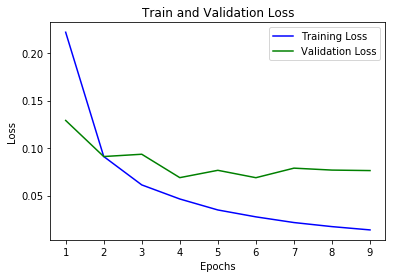

In [13]:
loss, val_loss = history1.history["loss"], history1.history["val_loss"] # accumulate data

epochs = range(1, len(loss) + 1) # number of epochs experiment ran

plt.plot(epochs, loss, "b", label="Training Loss", color="blue")
plt.plot(epochs, val_loss, "b", label="Validation Loss", color="green")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Train and Validation Loss")
plt.show()

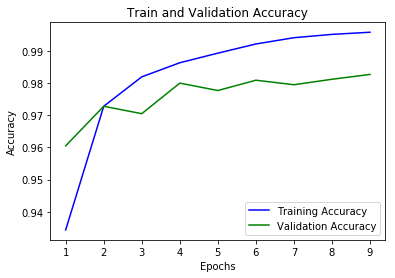

In [18]:
acc, val_acc = history1.history["acc"], history1.history["val_acc"] # accumulate data

epochs = range(1, len(acc) + 1) # number of epochs experiment ran

plt.plot(epochs, acc, "b", label="Training Accuracy", color="blue")
plt.plot(epochs, val_acc, "b", label="Validation Accuracy", color="green")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Train and Validation Accuracy")
plt.show()

## CNN Model Visualization

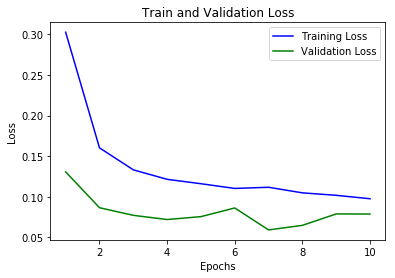

In [16]:
loss, val_loss = history2.history["loss"], history2.history["val_loss"] # accumulate data

epochs = range(1, len(loss) + 1) # number of epochs experiment ran

plt.plot(epochs, loss, "b", label="Training Loss", color="blue")
plt.plot(epochs, val_loss, "b", label="Validation Loss", color="green")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Train and Validation Loss")
plt.show()

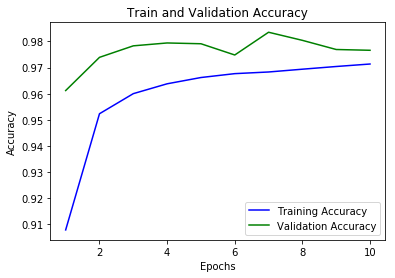

In [19]:
acc, val_acc = history2.history["acc"], history2.history["val_acc"] # accumulate data

epochs = range(1, len(acc) + 1) # number of epochs experiment ran

plt.plot(epochs, acc, "b", label="Training Accuracy", color="blue")
plt.plot(epochs, val_acc, "b", label="Validation Accuracy", color="green")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Train and Validation Accuracy")
plt.show()

As you can see, the CNN model is more robust and generalized than the simpler perceptron architecture in this scenario even though they perform very similar.